# Etude de l'enquête ETIC du 2nd degré

Dans cette analyse, notre objectif était d'étudier cette enquête pour pouvoir ensuite donner un score ETIC à chaque établissement pour ensuite pouvoir faire des études de ce score avec le label numérique par exemple. C'est la source de données que nous avons trouvées assez complètes qui nous donne les informations sur les moyens numériques dans ces établissements. Cette étude porte sur les lycées et les collèges.

Nous voulons mettre en place une formule qui permet de donner un score à chaque établissement en fonction des réponses fournies à l'enquéte. 
Seul problème, c'est qu'on a 80 colonnes dans cette enquête. Il est difficile donc d'utiliser une méthode pour analyser toutes ces colonnes.

Dans un premier temps, nous avons mis en place une formule dans laquelle nous avions gardé les colonnes jugés intéressantes du point de vue du numérique. Mais nous ne sommes rapidement rendu compte que rien ne justifiait nos choix et peut-être que nous avions raté des informations importantes. Nous avons aussi réalisé l'importance de mettre en place des poids car si cela se trouve il y a des colonnes qui sont fortement liés et donc ne devraient pas influencer énormément le score car une implique l'autre.

Pour pouvoir accorder des poids, nous avions choisi de faire une ACM avec les colonnes existantes. Chose qui est presque impossible à interpréter car nous avons 80 variables avec chacune au moins deux modalités.

Nous avons donc décidé de réduire le nombre de colonnes en faisant plusieurs analyses en parallèle qui nous ont permis de réduire le nombre des colonnes.
Les analyses sont les suivantes :
- analyse sur la maintenance qui nous a permis de réduire 6 colonnes en une seule
- analyse sur l'accés Web : de 7 colonnes à une seule
- analyse sur les services numériques : de 9 colonnes à 1 colonne
- analyse sur les ressources numériques mises à disposition :  de 7 colonnes à 1 colonne
- analyse sur les terminaux : de 15 colonnes à 1 colonne
- analyse sur le bon usage de Internet (Charte Web) : de 9 colonnes à 1 seule colonne

Ces études en détails nous ont permis de réduire le nombre de colonnes de 47 colonnes.
Vous pouvez trouver ces études dans les différents notebook pour plus de détails.

Il ne nous reste qu'à supprimer les colonnes que nous jugeons pas intéressantes et ensuite procéder à une ACM pour pouvoir analyser et accorder à chaque colonne un poids. De cette façon, nous pourrons établir une formule pour le poids et accorder un score ETIC à chaque établissement.


### *Import des librairies*



In [3]:
import pandas as pd
import plotly.express as px

## *ETL*
### Import des fichiers

In [4]:
#import du fichier principal
df = pd.read_csv('../data/lycee-college/fr-en-etic_2d.csv', sep=';', index_col=0)

# import des fichiers de données des analyses
df_charte = pd.read_csv('../data/analyses/charte_num.csv', sep=';', index_col=0)
df_acc_web = pd.read_csv('../data/analyses/acces_web.csv', sep=';', index_col=0)
df_termin = pd.read_csv('../data/analyses/terminaux_num.csv', sep=';', index_col=0)
df_services = pd.read_csv('../data/analyses/services_num.csv', sep=';', index_col=0)
df_acc_ressources = pd.read_csv('../data/analyses/acces_ressources.csv', sep=';', index_col=0)
df_maint = pd.read_csv('../data/analyses/maintenance.csv', sep=';', index_col=0)

### Transformation des données

On va principalement supprimer les colonnes inutiles dans le dataframe principal.

In [5]:
df.columns

Index(['Millesime', 'Code_nature', 'nature_uai', 'typ_etab', 'Academie',
       'Departement', 'NbEleve', 'NbEnseignant', 'SiEtabCentreRessource',
       'SiProjetNumEcole', 'SiEntDisponible', 'SiProjEtabIntegreENT',
       'Maint_PersCollect', 'Maint_PrestaExt', 'Maint_PersonnelEducNatHsEtab',
       'Maint_PersonnelEtab', 'Maint_AutreNeSaitPas', 'Maint_Personne',
       'NbRessourceEdit', 'TpRess_ManuelNum', 'TpRess_AnimScienLogiSimu',
       'TpRess_Bdd', 'TpRess_LogiOutils', 'TpRess_OuvRef',
       'TpRess_ResEntrainement', 'TpRess_Autres', 'TpRess_aucune',
       'ServInt_NoteElev', 'ServInt_AbsElev', 'ServInt_EdtElevCls',
       'ServInt_CahierTxt', 'ServInt_DocRessPeda', 'ServInt_AgdActuEtab',
       'ServInt_PlatApp', 'ServInt_Autres', 'ServInt_aucun', 'NbTerminaux',
       'NbTablette', 'NbTablettePC', 'NbMicroMoins5', 'NbMicroPortable',
       'NbPortAffEl', 'NbPortAffEns', 'NbEleveEqASH', 'NbPosteEqASH', 'NbTBI',
       'propClassesAvecTBI', 'NbVideoProj', 'NbClassMobile', '

In [ ]:
df.drop(columns=['Code_nature', 'nature_uai',
       'Maint_PersCollect', 'Maint_PrestaExt', 'Maint_PersonnelEducNatHsEtab',
       'Maint_PersonnelEtab', 'Maint_AutreNeSaitPas', 'Maint_Personne',
       'NbRessourceEdit', 'TpRess_ManuelNum', 'TpRess_AnimScienLogiSimu',
       'TpRess_Bdd', 'TpRess_LogiOutils', 'TpRess_OuvRef',
       'TpRess_ResEntrainement', 'TpRess_Autres', 'TpRess_aucune',
       'ServInt_NoteElev', 'ServInt_AbsElev', 'ServInt_EdtElevCls',
       'ServInt_CahierTxt', 'ServInt_DocRessPeda', 'ServInt_AgdActuEtab',
       'ServInt_PlatApp', 'ServInt_Autres', 'ServInt_aucun', 'NbTerminaux',
       'NbTablette', 'NbTablettePC', 'NbMicroMoins5', 'NbMicroPortable',
       'NbPortAffEl', 'NbPortAffEns', 'NbEleveEqASH', 'NbPosteEqASH', 'NbTBI',
       'propClassesAvecTBI', 'NbVideoProj', 'NbClassMobile', 'NbLecteurMpx',
       'NbImpr3D', 'AccWeb_RTC', 'AccWeb_CableFibreOptique', 'AccWeb_ADSL',
       'AccWeb_AutresHautDebit', 'AccWeb_NeSaitPas', 'AccWeb_Aucun',
       'DebitWeb', 'SiWifi', 'SalleInternet',
       'SiPareFeuEtab', 'SiOuifiltrageWeb', 'ControlePosteriori',
       'SiCharteUsageWeb', 'Diffch_AnnexeeRI',
       'Diffch_DossierRentreeEnseignants', 'Diffch_CRConseilAdmin',
       'Diffch_DiffusionParents', 'Diffch_Autres', 'AccesParentCharte',
       'ElvAuthentif', 'SiEntUtilise',
       'TypeMatHandi_Tablette', 'TypeMatHandi_OrdiPort', 'TypeMatHandi_LogApp',
       'TypeMatHandi_Autre'], inplace=True)

_________________________

In [3]:
import pandas as pd
import prince as pc

In [4]:
#Import des données

df = pd.read_csv('../data/lycee-college/fr-en-etic_2d.csv', sep=';')

In [3]:
print(df.columns)

print(df.shape)

Index(['Code_UAI', 'Millesime', 'Code_nature', 'nature_uai', 'typ_etab',
       'Academie', 'Departement', 'NbEleve', 'NbEnseignant',
       'SiEtabCentreRessource', 'SiProjetNumEcole', 'SiEntDisponible',
       'SiProjEtabIntegreENT', 'Maint_PersCollect', 'Maint_PrestaExt',
       'Maint_PersonnelEducNatHsEtab', 'Maint_PersonnelEtab',
       'Maint_AutreNeSaitPas', 'Maint_Personne', 'NbRessourceEdit',
       'TpRess_ManuelNum', 'TpRess_AnimScienLogiSimu', 'TpRess_Bdd',
       'TpRess_LogiOutils', 'TpRess_OuvRef', 'TpRess_ResEntrainement',
       'TpRess_Autres', 'TpRess_aucune', 'ServInt_NoteElev', 'ServInt_AbsElev',
       'ServInt_EdtElevCls', 'ServInt_CahierTxt', 'ServInt_DocRessPeda',
       'ServInt_AgdActuEtab', 'ServInt_PlatApp', 'ServInt_Autres',
       'ServInt_aucun', 'NbTerminaux', 'NbTablette', 'NbTablettePC',
       'NbMicroMoins5', 'NbMicroPortable', 'NbPortAffEl', 'NbPortAffEns',
       'NbEleveEqASH', 'NbPosteEqASH', 'NbTBI', 'propClassesAvecTBI',
       'NbVideoProj',

## Analyse générale

In [6]:
df_test = df.drop(columns=['Code_UAI', 'Millesime', 'Code_nature', 'nature_uai', 'typ_etab',
       'Academie', 'Departement', 'NbEleve', 'NbEnseignant',
        'NbRessourceEdit',
        'NbTerminaux', 'NbTablette', 'NbTablettePC',
       'NbMicroMoins5', 'NbMicroPortable', 'NbPortAffEl', 'NbPortAffEns',
       'NbEleveEqASH', 'NbPosteEqASH', 'NbTBI', 'propClassesAvecTBI',
       'NbVideoProj', 'NbClassMobile', 'NbLecteurMpx', 'NbImpr3D',
        'PostesInfoElvHorsCours',
       'SiPareFeuEtab', 'SiOuifiltrageWeb', 
       'ElvAuthentif', 'SiVisioConferenc', 'SiEntUtilise',
       'TypeMatHandi_Tablette', 'TypeMatHandi_OrdiPort', 'TypeMatHandi_LogApp',
       'TypeMatHandi_Autre', 'Code_region', 'Libelle_region'], inplace=False)

df_test = df_test.dropna()

In [7]:
mca_test = pc.MCA(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
)

mca_test = mca_test.fit(df_test)

Text(0.5, 1.0, 'ACM Général')

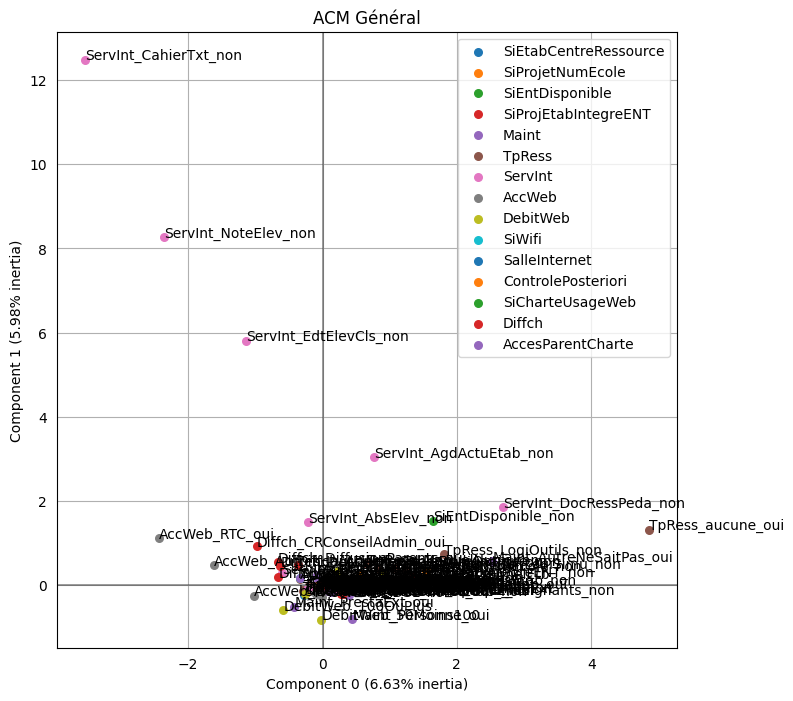

In [8]:
ax2 = mca_test.plot_coordinates(
    X=df_test,
    ax=None,
    figsize=(8, 8),
    show_row_points=False,
    row_points_size=10,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=True,
    legend_n_cols=1
)

ax2.set_title('ACM Général')

Nous avons pu voir que seulement 12.61% de l'inertie est permise par ces axes, très peu d'informations est restitué. On va donc aller plus en profondeur


### Maintenance ACM

In [14]:
#Suppression des colonnes inutiles
df_maintenance = df.drop(columns=['Code_UAI', 'Millesime', 'Code_nature', 'nature_uai', 'typ_etab',
       'Academie', 'Departement', 'NbEleve', 'NbEnseignant',
       'SiEtabCentreRessource', 'SiProjetNumEcole', 'SiEntDisponible',
       'SiProjEtabIntegreENT', 'NbRessourceEdit',
       'TpRess_ManuelNum', 'TpRess_AnimScienLogiSimu', 'TpRess_Bdd',
       'TpRess_LogiOutils', 'TpRess_OuvRef', 'TpRess_ResEntrainement',
       'TpRess_Autres', 'TpRess_aucune', 'ServInt_NoteElev', 'ServInt_AbsElev',
       'ServInt_EdtElevCls', 'ServInt_CahierTxt', 'ServInt_DocRessPeda',
       'ServInt_AgdActuEtab', 'ServInt_PlatApp', 'ServInt_Autres',
       'ServInt_aucun', 'NbTerminaux', 'NbTablette', 'NbTablettePC',
       'NbMicroMoins5', 'NbMicroPortable', 'NbPortAffEl', 'NbPortAffEns',
       'NbEleveEqASH', 'NbPosteEqASH', 'NbTBI', 'propClassesAvecTBI',
       'NbVideoProj', 'NbClassMobile', 'NbLecteurMpx', 'NbImpr3D',
       'AccWeb_RTC', 'AccWeb_CableFibreOptique', 'AccWeb_ADSL',
       'AccWeb_AutresHautDebit', 'AccWeb_NeSaitPas', 'AccWeb_Aucun',
       'DebitWeb', 'SiWifi', 'SalleInternet', 'PostesInfoElvHorsCours',
       'SiPareFeuEtab', 'SiOuifiltrageWeb', 'ControlePosteriori',
       'SiCharteUsageWeb', 'Diffch_AnnexeeRI',
       'Diffch_DossierRentreeEnseignants', 'Diffch_CRConseilAdmin',
       'Diffch_DiffusionParents', 'Diffch_Autres', 'AccesParentCharte',
       'ElvAuthentif', 'SiVisioConferenc', 'SiEntUtilise',
       'TypeMatHandi_Tablette', 'TypeMatHandi_OrdiPort', 'TypeMatHandi_LogApp',
       'TypeMatHandi_Autre', 'Code_region', 'Libelle_region'], inplace=False)


df_maintenance.dropna(inplace=True, axis=0)


On va vérifier que les colonnes sont bien supprimées

In [12]:
print(df_maintenance.columns)
print(df_maintenance.shape)

Index(['Maint_PersCollect', 'Maint_PrestaExt', 'Maint_PersonnelEducNatHsEtab',
       'Maint_PersonnelEtab', 'Maint_AutreNeSaitPas', 'Maint_Personne'],
      dtype='object')
(881, 6)


Rennomage des colonnes

In [15]:
old_columns = df_maintenance.columns

for column in old_columns:
    df_maintenance.rename(columns={column: column.replace('Maint_', '').lower()}, inplace=True)

df_maintenance.head()

,perscollect,prestaext,personneleducnathsetab,personneletab,autrenesaitpas,personne
0,oui,non,non,oui,non,non
1,oui,non,non,oui,non,non
2,non,non,non,oui,non,non
4,oui,non,non,oui,non,non
5,oui,non,non,oui,non,non


Nous allons chercher si il y a bien lien entre ces diffèrentes variables qualitatives à l'aide d'une ACM. Le but est de réduire le nombre de colonnes à prendre en compte dans notre formule et voir si il existe une corrélation entre ces variables

In [7]:
mca = pc.MCA(
    n_components=2,
    n_iter=6,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
)

mca = mca.fit(df_maintenance)

On va passer maintenant à la visualisation graphique de l'ACM pour analyser le résultat

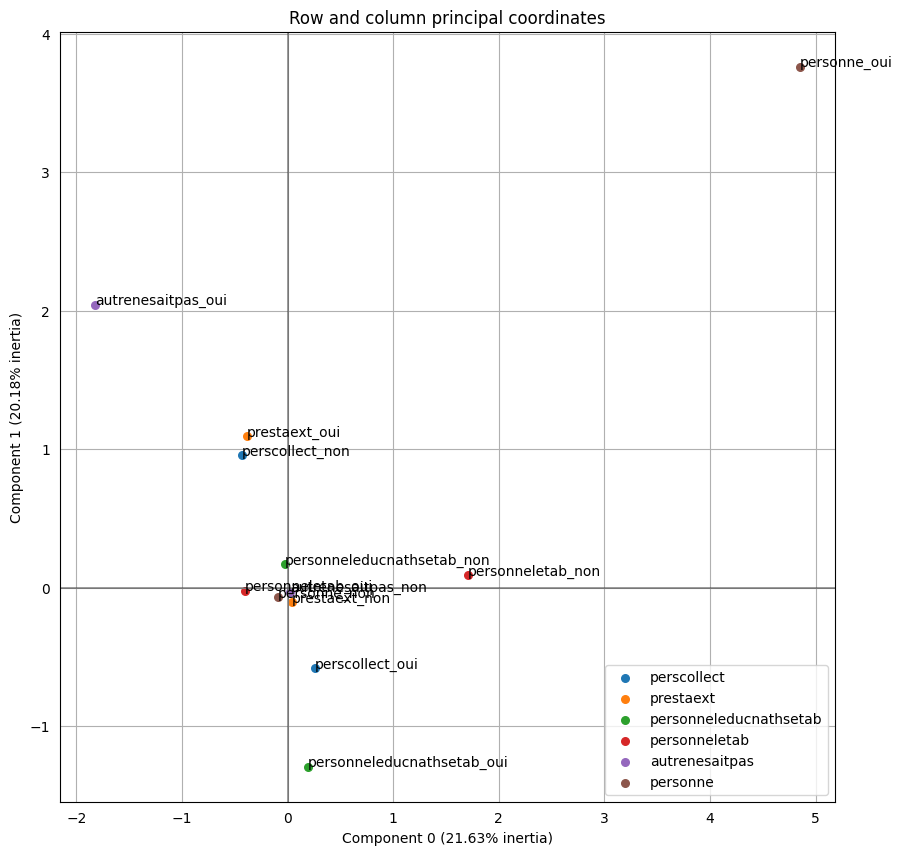

In [8]:
ax = mca.plot_coordinates(
    X=df_maintenance,
    ax=None,
    figsize=(10, 10),
    show_row_points=False,
    row_points_size=10,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=True,
    legend_n_cols=1
)

On va supprimer les lignes qui contiennent une modalité "oui" pour personne

In [32]:
df_maintenance = df_maintenance.loc[df_maintenance["personne"] != "oui"]
df_maintenance = df_maintenance.loc[df_maintenance["autrenesaitpas"] != "oui"]
df_maintenance = df_maintenance.loc[df_maintenance["prestaext"] != "oui"]
#df_maintenance = df_maintenance.loc[df_maintenance["personneleducnathsetab"] != "oui"]
#df_maintenance = df_maintenance.loc[df_maintenance["personneletab"] != "non"]

print(df_maintenance["personne"].value_counts())

non    775
Name: personne, dtype: int64


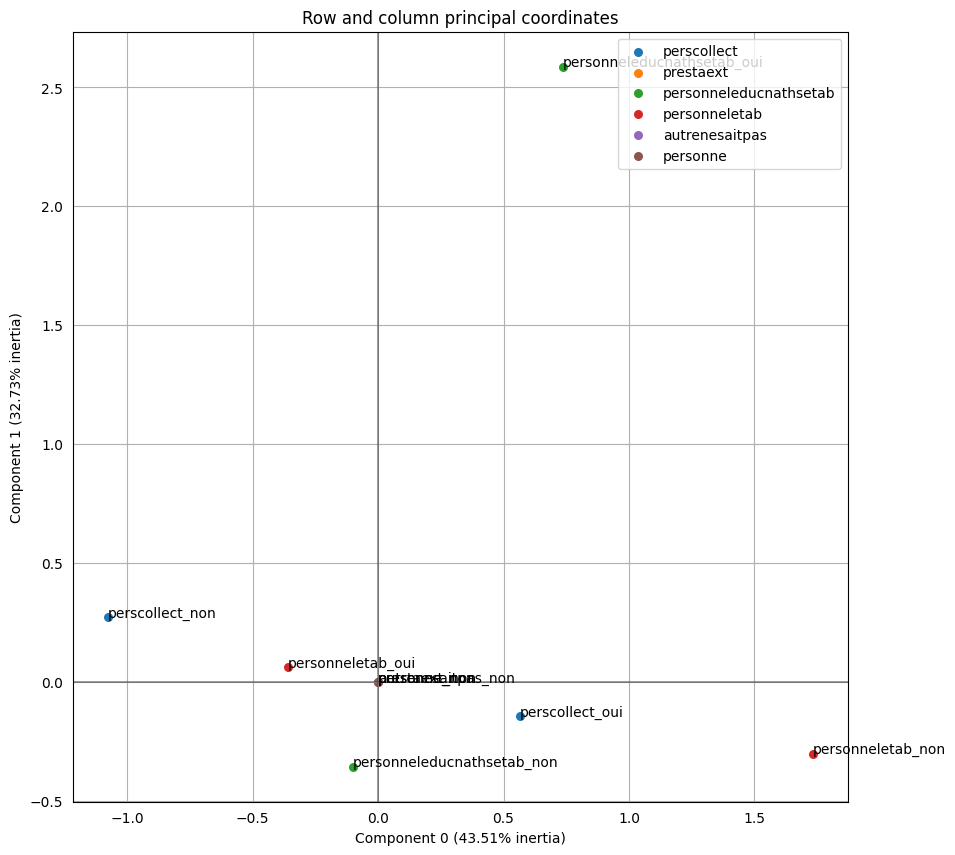

In [33]:
mca3 = pc.MCA(
    n_components=2,
    n_iter=6,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
)

mca3 = mca3.fit(df_maintenance)

ax3 = mca3.plot_coordinates(
    X=df_maintenance,
    ax=None,
    figsize=(10, 10),
    show_row_points=False,
    row_points_size=20,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=True,
    legend_n_cols=1
)

In [98]:
mca.total_inertia_

1.0

## Clustering

Je vais essayer de faire du clustering sur ces données pour voir si je peux dégager des classes qui se ressemblent pour la **maintenance**.
Je vais utiliser l'algo de KMeans fourni par la bibliothèque de sklearn

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

Avant de faire le kmeans, je dois préparer les données en transformant les oui en 1 et les non en 0.

In [17]:
columns_names = df_maintenance.columns

for column in columns_names:
    df_maintenance[column] = df_maintenance[column].replace("oui", 1)
    df_maintenance[column] = df_maintenance[column].replace("non", 0)
    df_maintenance[column] = df_maintenance[column].astype(float)


df_maintenance.head()

,perscollect,prestaext,personneleducnathsetab,personneletab,autrenesaitpas,personne
0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0
5,1.0,0.0,0.0,1.0,0.0,0.0


On va d'abord procéder à une ACP avant de faire du clustering car il faut passer en deux dimensions 

In [11]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

In [19]:
km = KMeans(
    n_clusters=3,
    init='random',
    max_iter=300, 
    random_state=0
)

y_km = km.fit_predict(df_maintenance)

print(km.feature_names_in_)
print(km.cluster_centers_)

['perscollect' 'prestaext' 'personneleducnathsetab' 'personneletab'
 'autrenesaitpas' 'personne']
[[ 1.00000000e+00  7.46987952e-02  1.42168675e-01  1.00000000e+00
   7.22891566e-03  0.00000000e+00]
 [ 7.91666667e-01  1.07142857e-01  1.30952381e-01  4.44089210e-16
   5.95238095e-03  9.52380952e-02]
 [-5.55111512e-16  9.73154362e-02  7.04697987e-02  1.00000000e+00
   2.68456376e-02  0.00000000e+00]]


On normalise les données et on les centrent

In [98]:
df_maint_scaled = StandardScaler().fit_transform(df_maintenance)

In [101]:
features = df_maint_scaled.T
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.00113636 -0.11976952  0.0846286  -0.17002424 -0.09026186 -0.12201659]
 [-0.11976952  1.00113636 -0.02538807 -0.03183118 -0.036666   -0.04243603]
 [ 0.0846286  -0.02538807  1.00113636 -0.02304808 -0.01192938 -0.04926932]
 [-0.17002424 -0.03183118 -0.02304808  1.00113636  0.03215061 -0.28050157]
 [-0.09026186 -0.036666   -0.01192938  0.03215061  1.00113636 -0.01600022]
 [-0.12201659 -0.04243603 -0.04926932 -0.28050157 -0.01600022  1.00113636]]


In [102]:
values, vectors = np.linalg.eig(covariance_matrix)

In [103]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print(np.sum(explained_variances), '\n', explained_variances)

0.9999999999999999 
 [0.09659803039776184, 0.21625900598632936, 0.20178734339238283, 0.15051510460632603, 0.16118802704966706, 0.17365248856753282]


In [125]:
projected_1 = df_maint_scaled.dot(vectors.T[0])
projected_2 = df_maint_scaled.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = None
for i in range(len(res)):
    res['Y'][i] = y_km[i]

res.Y.value_counts()

C:\Users\salim\AppData\Local\Temp\ipykernel_45200\1903336634.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['Y'][i] = y_km[i]


0    415
2    298
1    168
Name: Y, dtype: int64

In [130]:
res.shape

(881, 3)

In [139]:
proj_centers1 = km.cluster_centers_.dot(vectors.T[0])
proj_centers2 = km.cluster_centers_.dot(vectors.T[1])

print(proj_centers1, proj_centers2)
print(vectors.T[0], vectors.T[1])

[1.11175827 0.477511   0.62190333] [-0.43325282  0.28354089 -0.73779244]
[0.49639068 0.25393064 0.01780235 0.59310587 0.10547555 0.57087559] [ 0.29413256 -0.10507057  0.06052883 -0.72678192 -0.18814908  0.57893906]


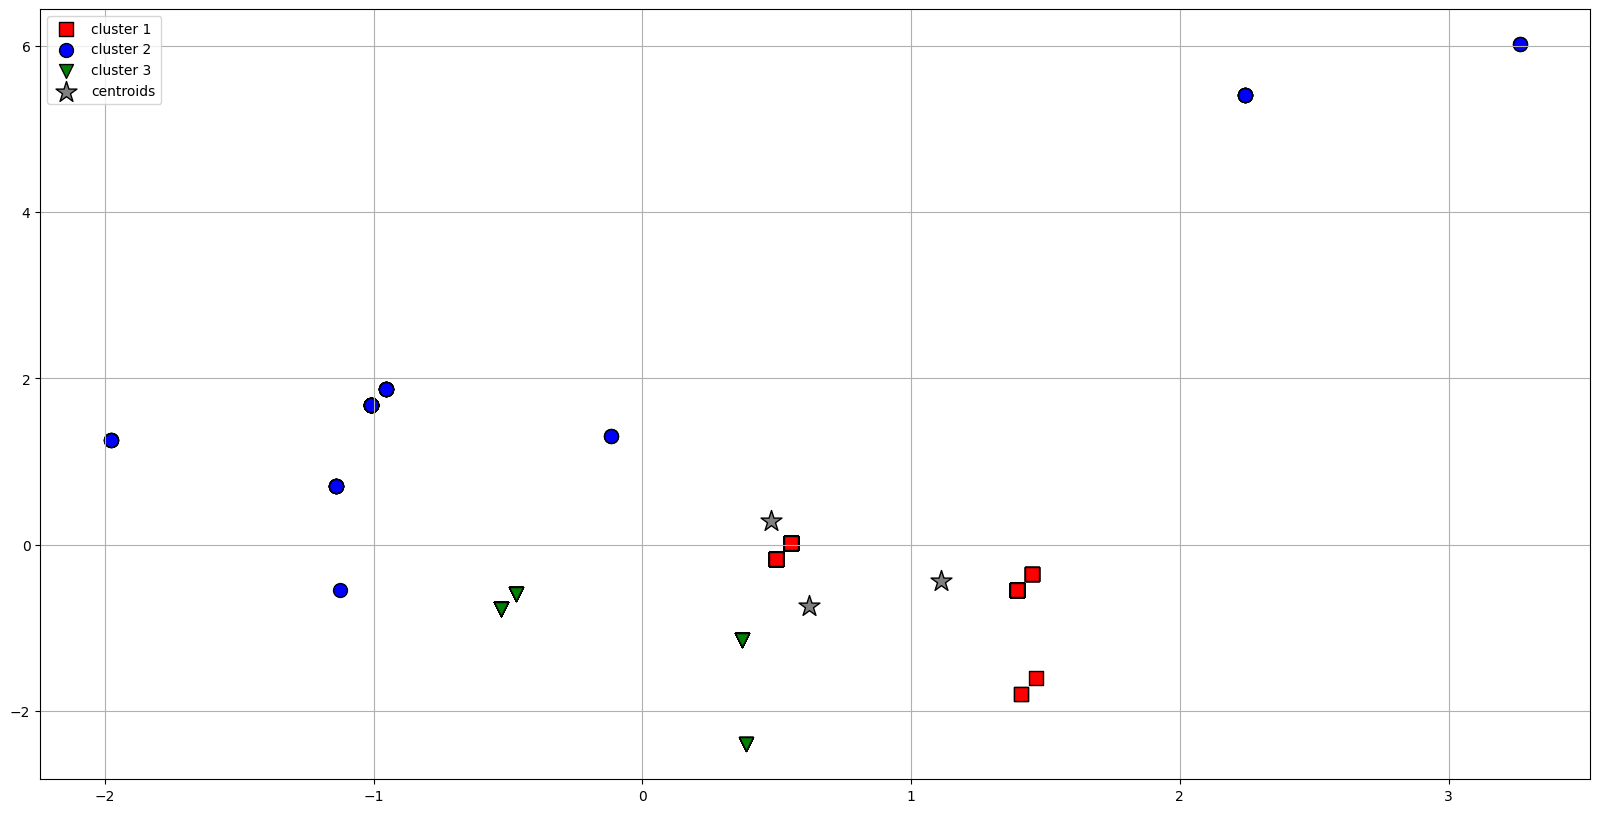

In [137]:
plt.figure(figsize=(20, 10))
#sns.scatterplot(x=res['PC1'],y=res['PC2'], hue=res['Y'], s=200)

plt.scatter(
    res[res['Y'] == 0].PC1,
    res[res['Y'] == 0].PC2,
    s=100, c='red',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    res[res['Y'] == 1].PC1,
    res[res['Y'] == 1].PC2,
    s=100, c='blue',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    res[res['Y'] == 2].PC1,
    res[res['Y'] == 2].PC2,
    s=100, c='green',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    proj_centers1, proj_centers2,
    s=250, marker='*',
    c='grey', edgecolor='black',
    label='centroids'
)

plt.legend()
plt.grid()
plt.show()


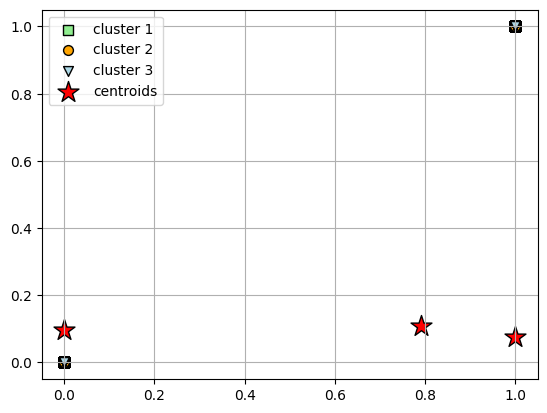

In [53]:
# plot the 3 clusters
plt.scatter(
    df_maintenance[y_km == 0], df_maintenance[y_km == 0],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    df_maintenance[y_km == 1], df_maintenance[y_km == 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    df_maintenance[y_km == 2], df_maintenance[y_km == 2],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)




plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [90]:
ward = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward',
    affinity='euclidean',
    compute_full_tree=True
).fit(df_maintenance)

plt.figure(figsize=(10, 8))
plt.scatter(
    df_maintenance
)

InvalidIndexError: (array([ True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True, False, False, False, False,  True,  True, False,
       False, False,  True,  True, False, False, False, False, False,
        True,  True, False,  True, False, False, False,  True,  True,
       False, False, False, False, False,  True,  True,  True, False,
       False,  True, False, False,  True,  True, False,  True, False,
       False,  True, False, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False,  True, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False,  True, False,  True,  True, False, False, False, False,
       False, False, False,  True, False,  True, False,  True,  True,
       False, False, False, False,  True,  True, False, False,  True,
        True, False, False, False,  True,  True,  True,  True, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False, False,  True,  True, False, False, False,  True,
        True,  True, False,  True, False, False,  True, False,  True,
        True, False, False, False, False,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False,  True, False, False, False, False, False,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False, False, False,  True,
       False,  True, False,  True, False,  True,  True, False, False,
        True, False, False,  True, False, False, False,  True,  True,
        True, False,  True, False,  True, False, False,  True, False,
        True, False, False, False,  True,  True,  True,  True, False,
       False, False, False, False,  True, False,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False,  True, False, False,  True,  True,  True,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
       False, False, False,  True, False,  True,  True,  True,  True,
        True, False, False, False,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True, False,  True,  True,
       False, False,  True,  True, False,  True, False, False,  True,
       False,  True, False, False, False,  True,  True,  True, False,
       False, False, False,  True, False, False,  True,  True, False,
       False,  True, False, False,  True,  True,  True,  True, False,
       False, False, False,  True,  True, False, False, False, False,
       False,  True, False,  True, False,  True, False, False, False,
        True, False,  True,  True,  True, False, False,  True, False,
        True,  True, False, False,  True,  True, False,  True,  True,
        True, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True, False,  True, False,  True, False, False, False,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
        True, False, False, False,  True, False, False,  True, False,
        True, False, False,  True,  True, False,  True,  True,  True,
        True,  True,  True, False, False,  True,  True, False,  True,
        True, False,  True,  True, False,  True,  True, False, False,
       False,  True, False, False, False,  True, False,  True,  True,
        True, False, False,  True, False, False, False,  True, False,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True, False,  True, False, False, False,  True,  True,  True,
        True,  True,  True, False,  True, False, False, False,  True,
        True, False,  True,  True,  True, False, False, False,  True,
       False, False,  True,  True, False, False, False,  True,  True,
       False,  True,  True, False,  True,  True, False, False, False,
        True, False,  True, False, False,  True, False,  True,  True,
        True,  True,  True, False,  True, False, False, False,  True,
        True, False,  True, False, False,  True, False, False, False,
       False, False,  True, False,  True, False,  True, False, False,
        True, False,  True, False, False,  True,  True,  True,  True,
        True,  True, False, False,  True, False,  True, False,  True,
       False, False, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False, False,  True,  True, False,
       False,  True, False, False, False, False, False, False, False,
        True, False,  True,  True, False,  True, False, False, False,
        True,  True, False, False,  True, False, False,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False,  True, False,  True,  True, False,  True,  True, False,
        True,  True, False, False, False, False, False,  True,  True,
        True, False,  True, False, False,  True,  True, False,  True,
        True, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True, False,
        True,  True,  True, False, False,  True,  True,  True,  True,
       False, False,  True, False,  True,  True,  True, False, False,
        True,  True, False, False,  True,  True, False, False, False,
       False, False, False, False,  True, False,  True,  True, False,
       False,  True,  True,  True, False, False, False, False,  True,
        True, False, False,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False,  True,  True,  True,
       False, False, False, False, False, False,  True,  True, False,
        True,  True, False,  True,  True, False, False, False, False,
        True,  True, False, False,  True, False,  True,  True, False,
       False,  True, False, False, False, False,  True, False, False,
       False,  True, False, False, False,  True,  True, False, False,
       False,  True, False,  True, False,  True, False,  True,  True,
       False, False, False,  True,  True,  True,  True, False, False,
        True,  True,  True,  True, False,  True,  True, False]), 0)

<Figure size 1000x800 with 0 Axes>

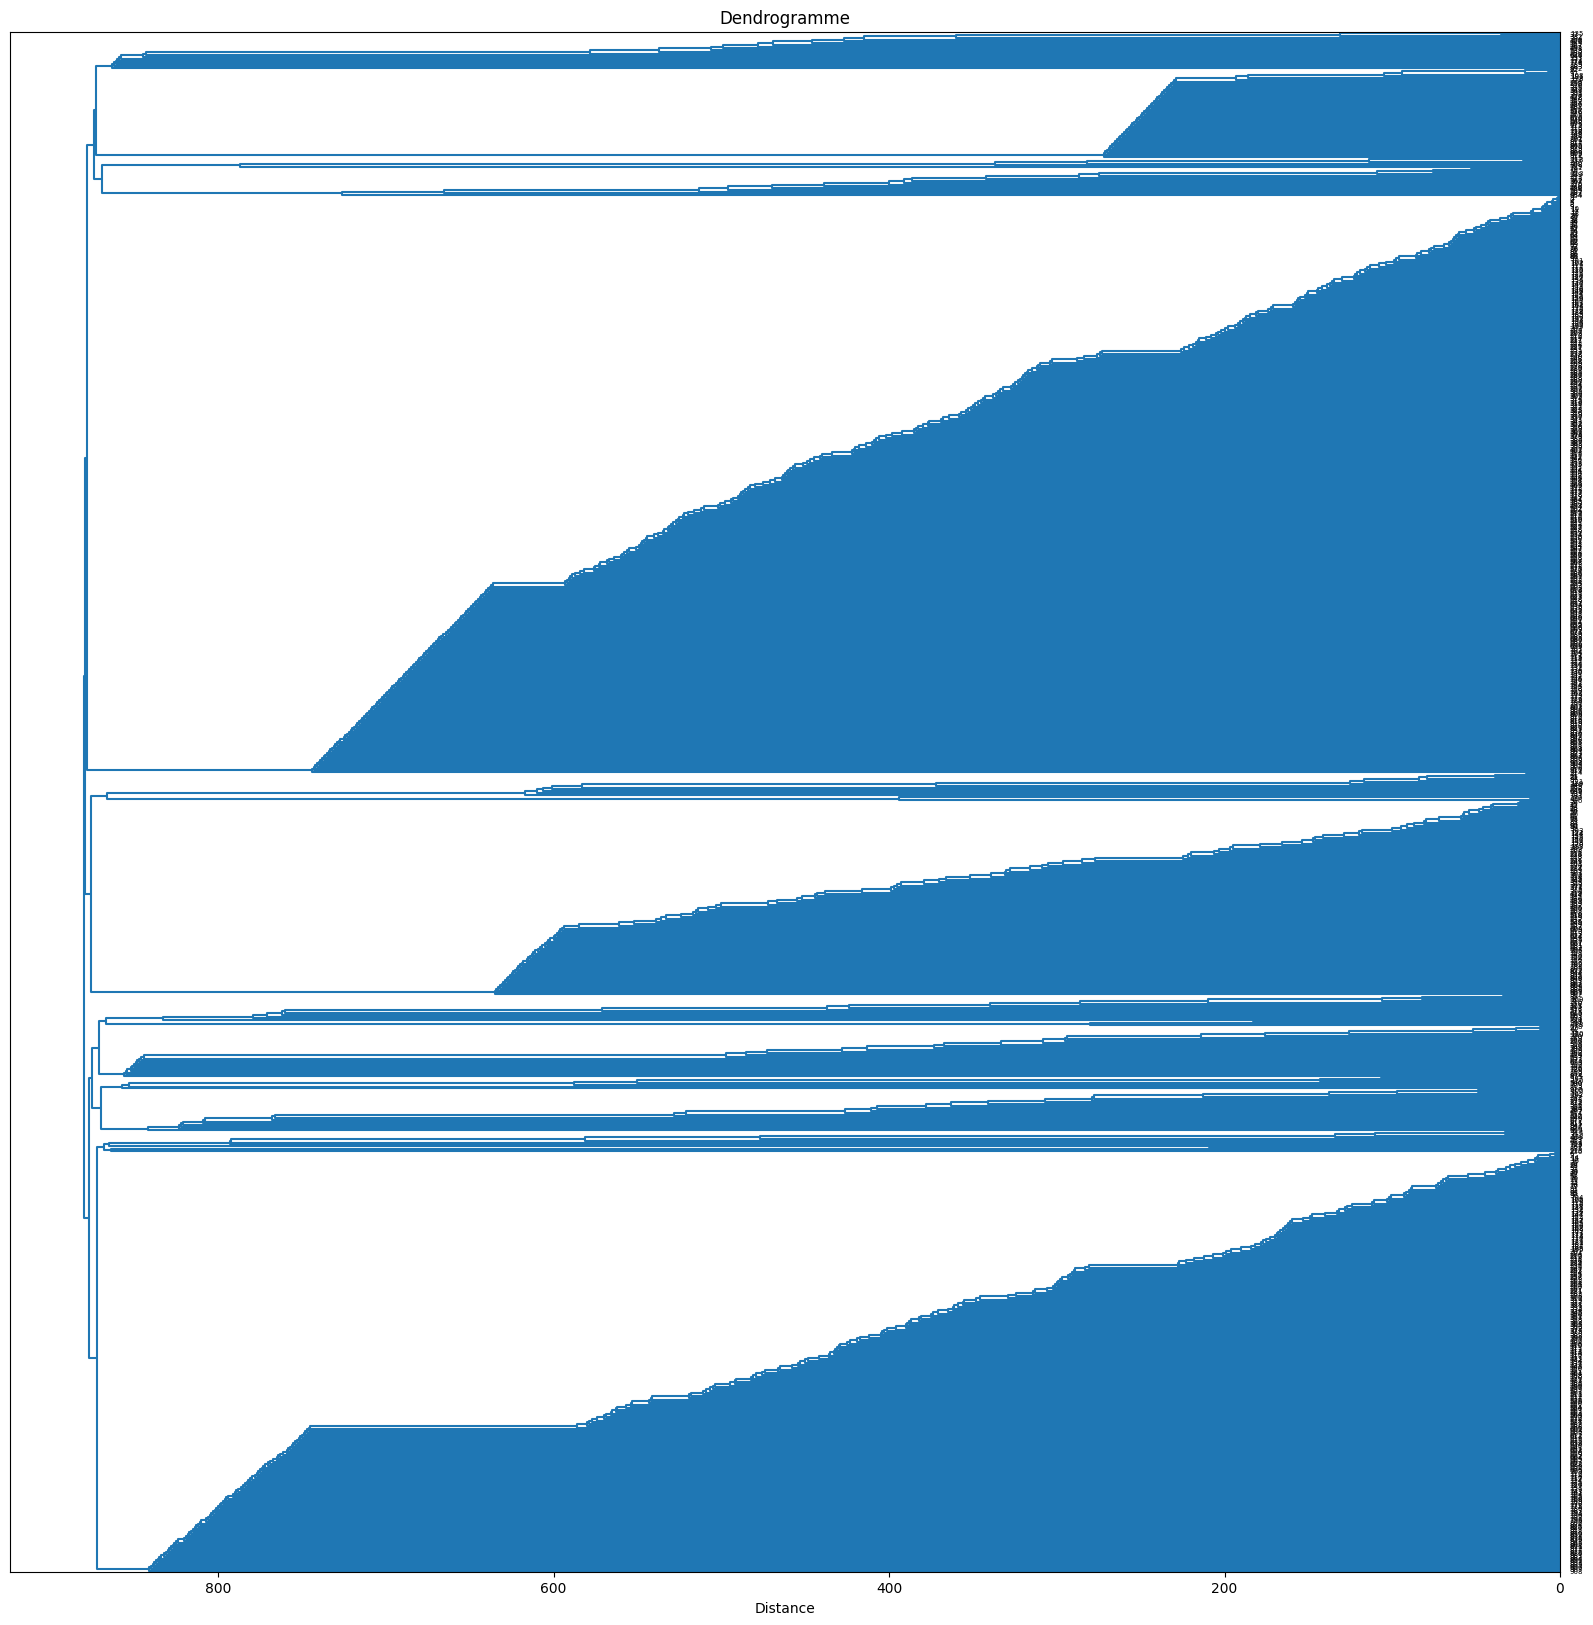

In [89]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

dendro = [ ]
for a,b in ward.children_:
    dendro.append([a, b, float(len(dendro)+1), len(dendro)+1])
    # le dernier coefficient devrait contenir le nombre de feuilles dépendant de ce noeud
    # et non le dernier indice
    # de même, le niveau (3ème colonne) ne devrait pas être le nombre de noeud
    # mais la distance de Ward

fig = plt.figure( figsize=(20,20) )
ax = fig.add_subplot(1,1,1)
plt.title("Dendrogramme")
plt.xlabel("Distance")
r = dendrogram(dendro, color_threshold=1, labels=list(df_maintenance.index),
               show_leaf_counts=True, ax=ax, orientation="left")